[View in Colaboratory](https://colab.research.google.com/github/raahatg21/Cats-and-Dogs-Dataset-with-Keras/blob/master/Cats_Dogs_2.ipynb)

# Cats vs Dogs: Binary Classification

**Using Data Augmentation on Simple CNN. 2,000/1,000/1,000 Data. From Google Drive. 80% Validation Accuracy. 77.25% Testing Accuracy.**

In [0]:
import numpy as np
import os
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
from keras import models
from keras import layers
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [3]:
#@title
# Accessing files from Google Drive

!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse

from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass

!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

gpg: keybox '/tmp/tmpkgq5m3l2/pubring.gpg' created
gpg: /tmp/tmpkgq5m3l2/trustdb.gpg: trustdb created
gpg: key AD5F235DF639B041: public key "Launchpad PPA for Alessandro Strada" imported
gpg: Total number processed: 1
gpg:               imported: 1
··········


In [4]:
# Making a directory named 'Drive' and linking it with Google Drive

!mkdir -p drive
!google-drive-ocamlfuse drive

fuse: mountpoint is not empty
fuse: if you are sure this is safe, use the 'nonempty' mount option


In [5]:
!ls

adc.json  datalab  drive  sample_data


In [0]:
train_dir = 'drive/cats_and_dogs_small/train'
val_dir = 'drive/cats_and_dogs_small/validation'
test_dir = 'drive/cats_and_dogs_small/test'

In [7]:
print('total validation images:', len(os.listdir(val_dir)))

total validation images: 2


In [0]:
# Building the Model 

model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)))
model2.add(layers.MaxPooling2D(2, 2))
model2.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model2.add(layers.MaxPooling2D(2, 2))
model2.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model2.add(layers.MaxPooling2D(2, 2))
model2.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model2.add(layers.MaxPooling2D(2, 2))
model2.add(layers.Flatten())
model2.add(layers.Dense(512, activation = 'relu'))
model2.add(layers.Dense(1, activation = 'sigmoid'))

In [9]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [0]:
# Compiling the Model

model2.compile(optimizer = optimizers.RMSprop(lr = 1e-4), loss = 'binary_crossentropy', metrics = ['acc'])

In [11]:
# Preprocessing and Data Augmentation

train_datagen = ImageDataGenerator(rescale = 1./255, rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size = (150, 150), batch_size = 20, class_mode = 'binary')
val_generator = test_datagen.flow_from_directory(val_dir, target_size = (150, 150), batch_size = 20, class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [12]:
# Looking at the Output of Image Data Generator

for data_batch, labels_batch in train_generator:
  print('Data Batch Shape', data_batch.shape)
  print('Labels Batch Shape', labels_batch.shape)
  break

Data Batch Shape (20, 150, 150, 3)
Labels Batch Shape (20,)


In [13]:
# Training

history = model2.fit_generator(train_generator, steps_per_epoch = 100, epochs = 50, validation_data = val_generator, validation_steps = 50)


Epoch 1/50
100/100 [==============================] - 46s 459ms/step - loss: 0.6937 - acc: 0.5260 - val_loss: 0.6802 - val_acc: 0.5740
Epoch 2/50
100/100 [==============================] - 42s 416ms/step - loss: 0.6771 - acc: 0.5630 - val_loss: 0.6692 - val_acc: 0.5630
Epoch 3/50
100/100 [==============================] - 39s 391ms/step - loss: 0.6640 - acc: 0.5950 - val_loss: 0.6398 - val_acc: 0.6150
Epoch 4/50
100/100 [==============================] - 43s 430ms/step - loss: 0.6460 - acc: 0.6345 - val_loss: 0.6403 - val_acc: 0.6230
Epoch 5/50
100/100 [==============================] - 44s 439ms/step - loss: 0.6246 - acc: 0.6580 - val_loss: 0.6246 - val_acc: 0.6310
Epoch 6/50
100/100 [==============================] - 43s 426ms/step - loss: 0.6230 - acc: 0.6485 - val_loss: 0.6072 - val_acc: 0.6600
Epoch 7/50
100/100 [==============================] - 40s 401ms/step - loss: 0.6050 - acc: 0.6740 - val_loss: 0.5758 - val_acc: 0.6950
Epoch 8/50
100/100 [==============================] - 3

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

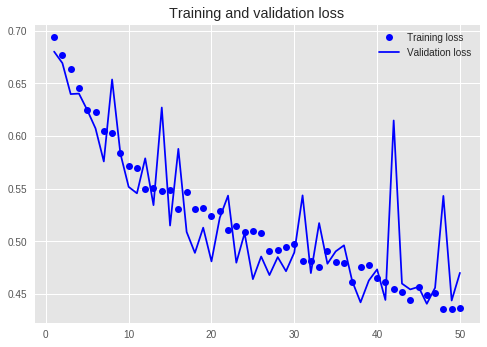

In [16]:
# Training and Validation Loss

epochs = range(1, 51)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

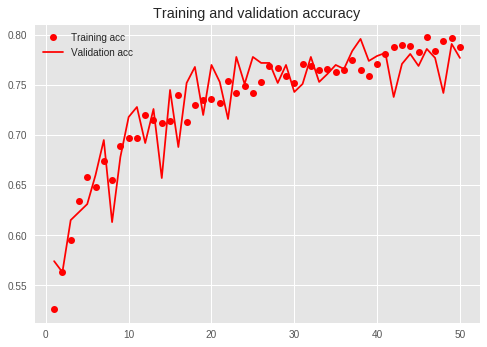

In [17]:
# Training and Validation Accuracy

plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

In [18]:
# Testing

test_generator = test_datagen.flow_from_directory(test_dir, target_size = (150, 150), batch_size = 20, class_mode = 'binary')
test_loss, test_acc = model2.evaluate_generator(test_generator)
test_loss, test_acc

Found 1007 images belonging to 2 classes.


(0.5161490765323469, 0.7725918551660934)